In [181]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import logging
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [182]:
data = pd.read_csv('C:\\Users\\shivam.shukla\\Documents\\Projects & POCs\\8. Churn Prediction Using Python\\Data\\Telco-Customer-Churn.csv')

In [183]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


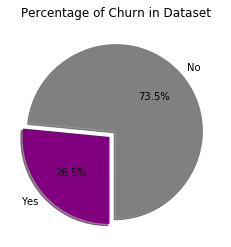

In [184]:
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
explode = (0, 0.1) 
labels = 'No','Yes'
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [185]:
data.drop(['customerID'], axis=1, inplace=True)

In [186]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [187]:
logging.basicConfig(level=logging.NOTSET)

In [188]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [189]:
data[['gender_Female','gender_Male']]  = pd.get_dummies(data['gender'])

In [190]:
data[['Churn','No Churn']] = pd.get_dummies(data["Churn"])

In [191]:
data[['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check']] = pd.get_dummies(data['PaymentMethod'])

In [192]:
data["Churn"] = data["Churn"].astype(int)

In [193]:
pd.get_dummies(data["PaperlessBilling"])

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,0,1
7039,0,1
7040,0,1
7041,0,1


In [194]:
data[['DSL','Fiber_optic','No']] = pd.get_dummies(data["InternetService"])

In [195]:
data[['Contract_Month-to-month','Contract_One year','Contract_Two Year']] = pd.get_dummies(data["Contract"])

In [196]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber_optic,No,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,1,0,1,0,0,1,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,0,0,1,1,0,0,0,1,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,0,0,1,1,0,0,1,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,0,0,1,0,0,0,1,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,1,0,0,1,0,1,0,0


In [197]:
data['OnlineSecurity'] = pd.get_dummies(data["OnlineSecurity"])

In [198]:
data['OnlineBackup'] = pd.get_dummies(data["OnlineBackup"])

In [199]:
data['DeviceProtection'] = pd.get_dummies(data["DeviceProtection"])

In [200]:
data['Partner'] = pd.get_dummies(data["Partner"])

In [201]:
data['Dependents'] = pd.get_dummies(data["Dependents"])

In [202]:
data['Dependents'] = pd.get_dummies(data["Dependents"])

In [203]:
data['PhoneService'] = pd.get_dummies(data["PhoneService"])

In [204]:
data['StreamingTV'] = pd.get_dummies(data["StreamingTV"])

In [205]:
data['TechSupport'] = pd.get_dummies(data["TechSupport"])

In [206]:
data = data.drop(labels = ["InternetService","gender","MultipleLines","StreamingTV","PaymentMethod","Contract","StreamingMovies","PaperlessBilling","PaymentMethod"],axis = 1)

In [207]:
data.rename(columns = {'No':'No Internet'}, inplace = True)

In [217]:
data.dropna()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,MonthlyCharges,...,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber_optic,No Internet,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,0,0,0,1,1,1,0,1,1,29.85,...,0,0,1,0,1,0,0,1,0,0
1,0,1,0,34,0,0,1,0,1,56.95,...,0,0,0,1,1,0,0,0,1,0
2,0,1,0,2,0,0,0,1,1,53.85,...,0,0,0,1,1,0,0,1,0,0
3,0,1,0,45,1,0,1,0,0,42.30,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,2,0,1,1,1,1,70.70,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,24,0,0,1,0,0,84.80,...,0,0,0,1,1,0,0,0,1,0
7039,0,0,1,72,0,1,0,0,1,103.20,...,0,1,0,0,0,1,0,0,1,0
7040,0,0,1,11,1,0,1,1,1,29.60,...,0,0,1,0,1,0,0,1,0,0
7041,1,0,0,4,0,1,1,1,1,74.40,...,0,0,0,1,0,1,0,1,0,0


In [226]:
data = data.drop(labels = ["No Internet"],axis = 1)

In [227]:
Y = data["Churn"].values
X = data.drop(labels = ["Churn"],axis = 1)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [229]:
#Importing the data into CSV just to check the shaped data.
#X_train.to_csv('C:\\Users\\shivam.shukla\\Documents\\Projects & POCs\\8. Churn Prediction Using Python\\Data\\11.csv')

In [230]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [231]:
weights = pd.Series(model.coef_[0],
index=X.columns.values)
weights.sort_values(ascending = False)

Mailed check                  1.055998
DSL                           0.947648
gender_Male                   0.881486
Contract_Two Year             0.746431
Partner                       0.625040
gender_Female                 0.590415
Dependents                    0.522659
Contract_Month-to-month       0.419647
DeviceProtection              0.359225
Contract_One year             0.305823
Credit card (automatic)       0.234636
Bank transfer (automatic)     0.126429
OnlineBackup                  0.113597
PhoneService                  0.096583
tenure                        0.061422
Electronic check              0.054838
MonthlyCharges                0.026908
TotalCharges                 -0.000444
SeniorCitizen                -0.131420
TechSupport                  -0.210138
OnlineSecurity               -0.387879
Fiber_optic                  -0.798403
No Churn                    -10.679197
dtype: float64

In [232]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

1.0
